In [174]:
import pandas as pd
import numpy as  np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

svr = SVR()
DT = DecisionTreeRegressor()
linear = LinearRegression()
random_forest = RandomForestRegressor()

In [51]:
df = pd.read_csv('P:\ML_Projects\placement_data\placement_preprocessed.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\IZU\AppData\Local\Temp\ipykernel_58952\2936906454.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('P:\ML_Projects\placement_data\placement_preprocessed.csv')


,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.000000,0.0,1.0,0.0,0.0,0.0,1.0
1,1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.000000,0.0,0.0,1.0,0.0,0.0,1.0
2,2,3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.000000,1.0,0.0,0.0,1.0,0.0,0.0
3,3,4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,288655.405405,0.0,0.0,1.0,0.0,0.0,1.0
4,4,5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.000000,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000.000000,0.0,1.0,0.0,1.0,0.0,0.0
211,211,212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000.000000,0.0,0.0,1.0,0.0,0.0,1.0
212,212,213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000.000000,0.0,1.0,0.0,1.0,0.0,0.0
213,213,214,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000.000000,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
df.describe()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,107.000000,108.000000,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,288655.405405,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,62.209324,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,77457.900102,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.500000,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,250000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107.000000,108.000000,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,288655.405405,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,160.500000,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,288655.405405,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,214.000000,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['salary',df.columns[0]],axis=1),df['salary'],test_size=0.3,random_state=32)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(150, 18) (65, 18) (150,) (65,)


MSE :  4900348057.9801855
MAE :  40690.203551972794
R2 Score :  -55110358515.44618


Text(0.5, 1.0, 'Support Vector Regression')

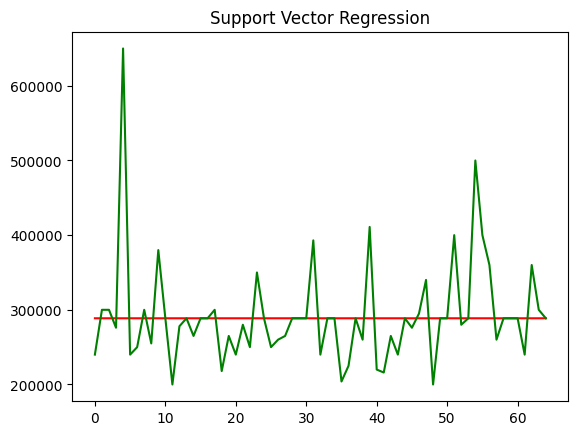

In [156]:
svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Support Vector Regression")

## Red line is predicted value 
## Green line is actual value

MSE :  5364161207.198391
MAE :  48904.57144733226
R2 Score :  -4.452753212836402


Text(0.5, 1.0, 'Linear Regressor Model')

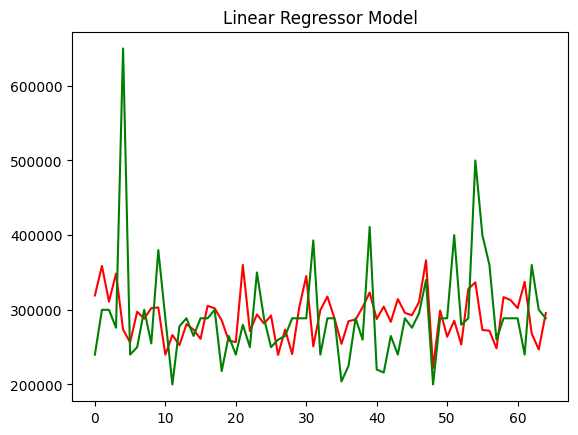

In [159]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Linear Regressor Model")

MSE :  12521796244.451313
MAE :  58482.22453222453
R2 Score :  -0.3679182277612536


Text(0.5, 1.0, 'Dessision Tree Regressor')

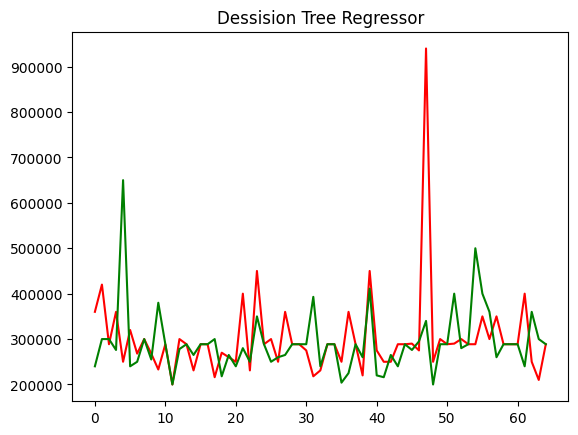

In [164]:
DT = DecisionTreeRegressor(random_state=32)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

df_Y_y = pd.concat([df_yp,df_yt],axis=1)

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Dessision Tree Regressor")

MSE :  4943628154.276283
MAE :  44371.99376299381
R2 Score :  -4.609320299789892


Text(0.5, 1.0, 'random forest Regressor')

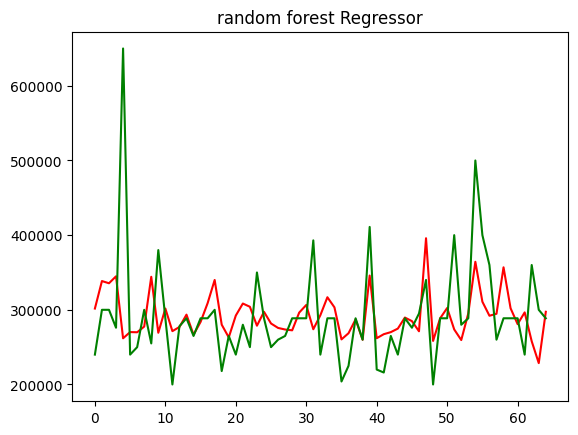

In [167]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

df_Y_y = pd.concat([df_yp,df_yt],axis=1)

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("random forest Regressor")


MSE :  5733209333.752778
MAE :  46707.24761952792
R2 Score :  -2.5342269665945154


Text(0.5, 1.0, 'Gradient Boosting Regressor')

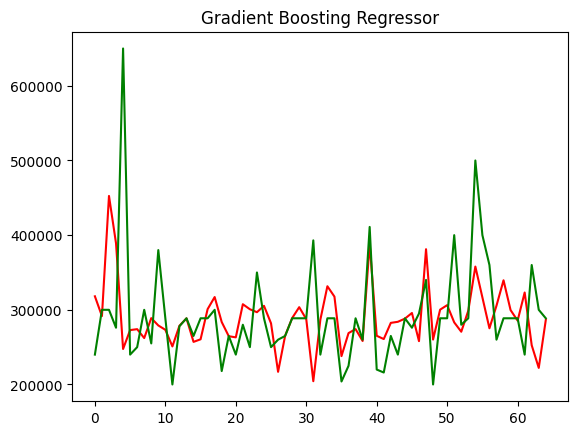

In [170]:
gdr = GradientBoostingRegressor(random_state=43)
gdr.fit(x_train,y_train)
y_pred = gdr.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

df_Y_y = pd.concat([df_yp,df_yt],axis=1)

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Gradient Boosting Regressor")

MSE :  5321154091.9851885
MAE :  48601.585527874566
R2 Score :  -4.655516634422678


Text(0.5, 1.0, 'Ridge Regressor')

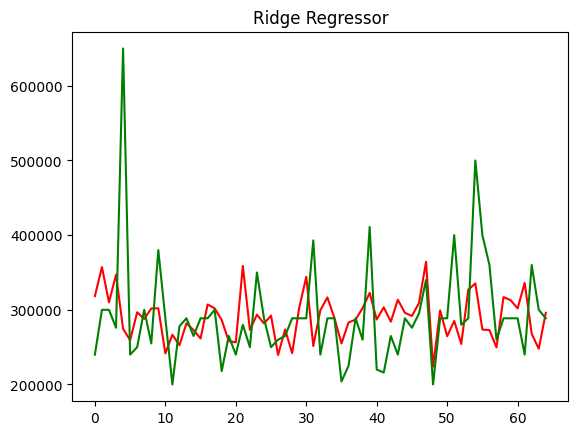

In [175]:
ridge = Ridge(random_state=43)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

df_Y_y = pd.concat([df_yp,df_yt],axis=1)

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Ridge Regressor")

MSE :  5363895358.7512865
MAE :  48904.43196338435
R2 Score :  -4.454237087387444


Text(0.5, 1.0, 'Lasso Regressor')

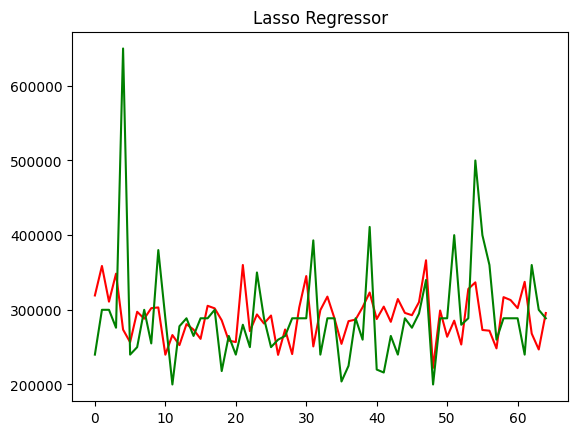

In [176]:
lasso = Lasso(random_state=43)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
print("MSE : ",mean_squared_error(y_pred,y_test))
print("MAE : ",mean_absolute_error(y_pred,y_test))
print("R2 Score : ",r2_score(y_pred,y_test))
df_yp = pd.DataFrame(y_pred.tolist(),columns=['Y_pred'])
df_yt = pd.DataFrame(y_test.to_list(),columns=['Y_true'])

df_Y_y = pd.concat([df_yp,df_yt],axis=1)

plt.plot(df_yp,c='r')
plt.plot(df_yt,c = 'g')
plt.title("Lasso Regressor")